In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load data from csv 
trial1_results = pd.read_csv('CNN_WithTime_Offset_3_Trial_1.csv', header=0)
trial2_results = pd.read_csv('CNN_WithTime_Offset_3_Trial_2.csv', header=0)
trial3_results = pd.read_csv('CNN_WithTime_Offset_3_Trial_3.csv', header=0)

In [3]:
trial1_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.0000,0.0
1,2.0,0.0,10.0000,1000.0
2,3.0,0.0,10.0000,2000.0
3,4.0,0.0,6.4309,3000.0
4,5.0,0.0,5.8838,4000.0
...,...,...,...,...
3001,3002.0,9.0,5.6351,772500.0
3002,3003.0,9.0,5.6351,771500.0
3003,3004.0,9.0,5.6351,770500.0
3004,3005.0,9.0,5.6351,769500.0


In [4]:
trial2_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.0000,0.0
1,2.0,0.0,10.0000,1000.0
2,3.0,0.0,10.0000,2000.0
3,4.0,0.0,6.4309,3000.0
4,5.0,1.0,6.0262,3900.0
...,...,...,...,...
3001,3002.0,0.0,4.5894,657900.0
3002,3003.0,0.0,4.5894,658900.0
3003,3004.0,1.0,4.5894,659800.0
3004,3005.0,1.0,5.0263,660700.0


In [5]:
trial3_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.0000,0.0
1,2.0,1.0,10.0000,900.0
2,3.0,1.0,10.0000,1800.0
3,4.0,1.0,6.3933,2700.0
4,5.0,1.0,5.7737,3600.0
...,...,...,...,...
3001,3002.0,7.0,4.3909,663100.0
3002,3003.0,2.0,4.3909,663900.0
3003,3004.0,2.0,4.3909,664700.0
3004,3005.0,2.0,4.3909,665500.0


## Analyse per timestep rewards

In [6]:
timeStop = 3000

In [7]:
trial1_rewards = trial1_results['Cummulative Reward'].tolist()
trial1_rewards = trial1_rewards[:timeStop]

In [8]:
trial2_rewards = trial2_results['Cummulative Reward'].tolist()
trial2_rewards = trial2_rewards[:timeStop]

In [9]:
trial3_rewards = trial3_results['Cummulative Reward'].tolist()
trial3_rewards = trial3_rewards[:timeStop]

In [10]:
data = {'Trial 1': trial1_rewards, 'Trial 2': trial2_rewards, 'Trial 3': trial3_rewards}
rewards_DF = pd.DataFrame(data=data)
rewards_DF

,Trial 1,Trial 2,Trial 3
0,0.0,0.0,0.0
1,1000.0,1000.0,900.0
2,2000.0,2000.0,1800.0
3,3000.0,3000.0,2700.0
4,4000.0,3900.0,3600.0
...,...,...,...
2995,778500.0,653500.0,661000.0
2996,777500.0,654500.0,660500.0
2997,776500.0,655500.0,661400.0
2998,775500.0,656500.0,662300.0


In [11]:
rewards_DF['mean'] = rewards_DF.mean(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean
0,0.0,0.0,0.0,0.000000
1,1000.0,1000.0,900.0,966.666667
2,2000.0,2000.0,1800.0,1933.333333
3,3000.0,3000.0,2700.0,2900.000000
4,4000.0,3900.0,3600.0,3833.333333
...,...,...,...,...
2995,778500.0,653500.0,661000.0,697666.666667
2996,777500.0,654500.0,660500.0,697500.000000
2997,776500.0,655500.0,661400.0,697800.000000
2998,775500.0,656500.0,662300.0,698100.000000


In [12]:
rewards_DF['Standard Deviation'] = rewards_DF[['Trial 1','Trial 2', 'Trial 3']].std(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean,Standard Deviation
0,0.0,0.0,0.0,0.000000,0.000000
1,1000.0,1000.0,900.0,966.666667,57.735027
2,2000.0,2000.0,1800.0,1933.333333,115.470054
3,3000.0,3000.0,2700.0,2900.000000,173.205081
4,4000.0,3900.0,3600.0,3833.333333,208.166600
...,...,...,...,...,...
2995,778500.0,653500.0,661000.0,697666.666667,70104.089277
2996,777500.0,654500.0,660500.0,697500.000000,69346.953790
2997,776500.0,655500.0,661400.0,697800.000000,68220.011727
2998,775500.0,656500.0,662300.0,698100.000000,67093.069687


In [13]:
rewards_upper = []
rewards_lower = []
for index, row in rewards_DF.iterrows():
    meanReward = row['mean']
    stdev = row['Standard Deviation']
    maxReward = meanReward + stdev
    rewards_upper.append(maxReward)
    minReward = meanReward - stdev
    rewards_lower.append(minReward)

In [14]:
rewards_mean = rewards_DF['mean'].tolist()
rewards_mean

[0.0,
 966.6666666666666,
 1933.3333333333333,
 2900.0,
 3833.3333333333335,
 4733.333333333333,
 4233.333333333333,
 4733.333333333333,
 5666.666666666667,
 6600.0,
 7466.666666666667,
 6800.0,
 6633.333333333333,
 6933.333333333333,
 7200.0,
 7466.666666666667,
 7700.0,
 7033.333333333333,
 6833.333333333333,
 6633.333333333333,
 6933.333333333333,
 7166.666666666667,
 6966.666666666667,
 6733.333333333333,
 6500.0,
 6266.666666666667,
 5600.0,
 5400.0,
 5200.0,
 4966.666666666667,
 5100.0,
 4866.666666666667,
 5066.666666666667,
 5166.666666666667,
 5266.666666666667,
 3766.6666666666665,
 2733.3333333333335,
 1700.0,
 666.6666666666666,
 -366.6666666666667,
 -1866.6666666666667,
 -1533.3333333333333,
 -1266.6666666666667,
 -1666.6666666666667,
 -2166.6666666666665,
 -2666.6666666666665,
 -3500.0,
 -3900.0,
 -4300.0,
 -4800.0,
 -6466.666666666667,
 -6800.0,
 -7166.666666666667,
 -7533.333333333333,
 -7933.333333333333,
 -7766.666666666667,
 -7933.333333333333,
 -7666.666666666667,
 

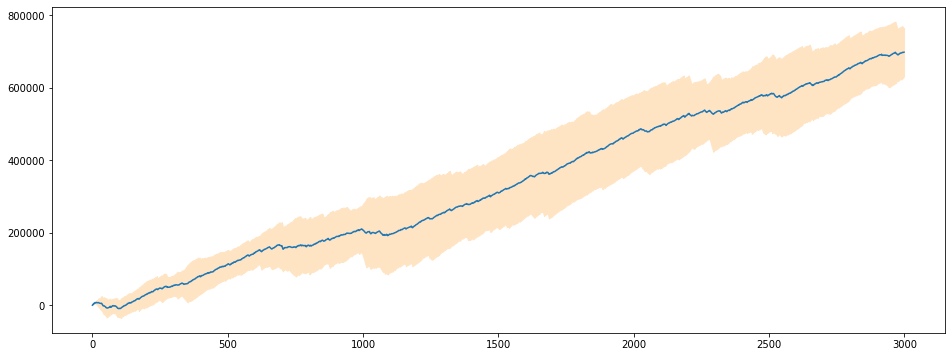

In [15]:
#plot graph 
x = [i for i in range(timeStop)]
plt.figure(figsize=(16, 6))
plt.plot(x, rewards_mean)
plt.fill_between(x, rewards_upper, rewards_lower, color='bisque')
plt.show()

## Analyse number of failure and maintenance instances

In [16]:
trial1_states = trial1_results['State'].tolist()
trial1_states = trial1_states[:3000]
trial1_states

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 1.0,
 1.0,
 2.0,
 6.0,
 6.0,
 1.0,
 1.0,
 1.0,
 1.0,
 5.0,
 5.0,
 5.0,
 0.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 6.0,
 1.0,
 1.0,
 2.0,
 3.0,
 7.0,
 2.0,
 3.0,
 3.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 0.0,
 1.0,
 2.0,
 3.0,
 3.0,
 7.0,
 2.0,
 2.0,
 3.0,
 8.0,
 0.0,
 1.0,
 1.0,
 2.0,
 3.0,
 7.0,
 2.0,
 3.0,
 3.0,
 3.0,
 7.0,
 7.0,
 7.0,
 2.0,
 3.0,
 3.0,
 8.0,
 8.0,
 8.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 1.0,
 1.0,
 2.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 1.0,
 1.0,
 1.0,
 1.0,
 5.0,
 0.0,
 1.0,
 1.0,
 1.0,
 5.0,
 5.0,
 5.0,
 0.0,
 0.0,
 9.0,
 9.0,
 9.0,
 9.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 5.0,
 5.0,
 5.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 5.0,
 5.0,
 0.0,
 0.0,
 1.0,
 2.0,
 6.0,
 1.0,
 2.0,
 2.0,
 2.0

In [17]:
def findNumEpisodes(stateList):
    previousState = stateList[0]
    currentState = stateList[0]
    endIndexes = []
    for order in range(len(stateList)):
        currentState = stateList[order]
        
        #check for failure
        if (currentState == 0) and (previousState > 7):
            endIndexes.append(order - 1)
            
        previousState = stateList[order]
    return len(endIndexes)

In [18]:
trial1_numEpisodes = findNumEpisodes(trial1_states)
trial1_numEpisodes

53

In [19]:
def findIndexesOfState(state, dataDF):
    stateIndexes = []
    for index, row in dataDF.iterrows():
        currentState = row['State']
        if currentState == state:
            timestep = row['Timestep']
            stateIndexes.append(timestep)
    return stateIndexes

In [20]:
trial1_results = trial1_results[:3000]
trial1_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.0000,0.0
1,2.0,0.0,10.0000,1000.0
2,3.0,0.0,10.0000,2000.0
3,4.0,0.0,6.4309,3000.0
4,5.0,0.0,5.8838,4000.0
...,...,...,...,...
2995,2996.0,9.0,5.6351,778500.0
2996,2997.0,9.0,5.6351,777500.0
2997,2998.0,9.0,5.6351,776500.0
2998,2999.0,9.0,5.6351,775500.0


In [21]:
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_indexes

[36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 51.0,
 68.0,
 69.0,
 70.0,
 203.0,
 702.0,
 703.0,
 704.0,
 705.0,
 706.0,
 771.0,
 772.0,
 773.0,
 789.0,
 790.0,
 791.0,
 807.0,
 808.0,
 809.0,
 852.0,
 853.0,
 854.0,
 855.0,
 856.0,
 892.0,
 893.0,
 1300.0,
 1301.0,
 1323.0,
 1324.0,
 1325.0,
 1326.0,
 1327.0,
 1424.0,
 1425.0,
 1426.0,
 1767.0,
 1815.0,
 2118.0,
 2119.0,
 2120.0,
 2121.0,
 2187.0,
 2188.0,
 2189.0,
 2206.0,
 2207.0,
 2208.0,
 2209.0,
 2210.0,
 2211.0,
 2212.0,
 2213.0,
 2214.0,
 2215.0,
 2264.0,
 2265.0,
 2266.0,
 2267.0,
 2268.0,
 2269.0,
 2270.0,
 2271.0,
 2354.0,
 2355.0,
 2493.0,
 2494.0,
 2495.0,
 2496.0,
 2624.0,
 2625.0,
 2626.0,
 2653.0,
 2654.0,
 2655.0,
 2656.0,
 2657.0,
 2658.0,
 2659.0,
 2660.0,
 2683.0,
 2684.0,
 2797.0,
 2798.0,
 2799.0,
 2800.0,
 2841.0,
 2842.0,
 2843.0,
 2844.0,
 2845.0,
 2969.0,
 2970.0,
 2971.0,
 2972.0,
 2973.0,
 2974.0,
 2975.0,
 2976.0]

In [22]:
def findNumInstancesInState(stateIndexes):
    previousIndex = stateIndexes[0]
    stateCount = 0
    for i in stateIndexes:
        if i - previousIndex > 1:
            stateCount += 1
        previousIndex = i
    return stateCount

In [23]:
trial1_state8_instanceCount = findNumInstancesInState(trial1_state8_indexes)
trial1_state8_instanceCount

26

In [24]:
#state 8

#trial1
trial1_results = trial1_results[:3000]
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_instanceCount = findNumInstancesInState(trial1_state8_indexes)
print("Number of instances in trial1 in state 8: %d" % trial1_state8_instanceCount)

#trial2
trial2_results = trial2_results[:3000]
trial2_state8_indexes = findIndexesOfState(8, trial2_results)
trial2_state8_instanceCount = findNumInstancesInState(trial2_state8_indexes)
print("Number of instances in trial2 in state 8: %d" % trial2_state8_instanceCount)

#trial3
trial3_results = trial3_results[:3000]
trial3_state8_indexes = findIndexesOfState(8, trial3_results)
trial3_state8_instanceCount = findNumInstancesInState(trial3_state8_indexes)
print("Number of instances in trial1 in state 8: %d" % trial3_state8_instanceCount)

average_state8_instanceCount = (trial1_state8_instanceCount + trial2_state8_instanceCount + trial3_state8_instanceCount)/3
print(f"Average number of instances in state 8: {average_state8_instanceCount}")

Number of instances in trial1 in state 8: 26
Number of instances in trial2 in state 8: 40
Number of instances in trial1 in state 8: 26
Average number of instances in state 8: 30.666666666666668


In [25]:
#state 9

#trial1
trial1_state9_indexes = findIndexesOfState(9, trial1_results)
trial1_state9_instanceCount = findNumInstancesInState(trial1_state9_indexes)
print("Number of instances in trial1 in state 9: %d" % trial1_state9_instanceCount)

#trial2
trial2_state9_indexes = findIndexesOfState(9, trial2_results)
trial2_state9_instanceCount = findNumInstancesInState(trial2_state9_indexes)
print("Number of instances in trial2 in state 9: %d" % trial2_state9_instanceCount)

#trial3
trial3_state9_indexes = findIndexesOfState(9, trial3_results)
trial3_state9_instanceCount = findNumInstancesInState(trial3_state9_indexes)
print("Number of instances in trial1 in state 9: %d" % trial3_state9_instanceCount)

average_state9_instanceCount = (trial1_state9_instanceCount + trial2_state9_instanceCount + trial3_state9_instanceCount)/3
print(f"Average number of instances in state 9: {average_state9_instanceCount}")

Number of instances in trial1 in state 9: 26
Number of instances in trial2 in state 9: 28
Number of instances in trial1 in state 9: 25
Average number of instances in state 9: 26.333333333333332


## Analyse percentage of time in each state

In [26]:
#state 0

#trial1
trial1_state0_indexes = findIndexesOfState(0, trial1_results)
trial1_state0_count = len(trial1_state0_indexes)
trial1_state0_percentage = trial1_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (0, trial1_state0_count, trial1_state0_percentage))

#trial2
trial2_state0_indexes = findIndexesOfState(0, trial2_results)
trial2_state0_count = len(trial2_state0_indexes)
trial2_state0_percentage = trial2_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (0, trial2_state0_count, trial2_state0_percentage))

#trial3
trial3_state0_indexes = findIndexesOfState(0, trial3_results)
trial3_state0_count = len(trial3_state0_indexes)
trial3_state0_percentage = trial3_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (0, trial3_state0_count, trial3_state0_percentage))

#average 
average_state0_count = (trial1_state0_count + trial2_state0_count + trial3_state0_count)/3
average_state0_percentage = average_state0_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (0, average_state0_count, average_state0_percentage))

Machine is in state 0 for 590 timesteps 0.1967 percentage of time in trial 1
Machine is in state 0 for 488 timesteps 0.1627 percentage of time in trial 2
Machine is in state 0 for 551 timesteps 0.1837 percentage of time in trial 3
Machine is in state 0 for 543.0000 timesteps 0.1810 percentage of time on average


In [27]:
#state 1

#trial1
trial1_state1_indexes = findIndexesOfState(1, trial1_results)
trial1_state1_count = len(trial1_state1_indexes)
trial1_state1_percentage = trial1_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (1, trial1_state1_count, trial1_state1_percentage))

#trial2
trial2_state1_indexes = findIndexesOfState(1, trial2_results)
trial2_state1_count = len(trial2_state1_indexes)
trial2_state1_percentage = trial2_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (1, trial2_state1_count, trial2_state1_percentage))

#trial3
trial3_state1_indexes = findIndexesOfState(1, trial3_results)
trial3_state1_count = len(trial3_state1_indexes)
trial3_state1_percentage = trial3_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (1, trial3_state1_count, trial3_state1_percentage))

#average 
average_state1_count = (trial1_state1_count + trial2_state1_count + trial3_state1_count)/3
average_state1_percentage = average_state1_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (1, average_state1_count, average_state1_percentage))

Machine is in state 1 for 657 timesteps 0.2190 percentage of time in trial 1
Machine is in state 1 for 612 timesteps 0.2040 percentage of time in trial 2
Machine is in state 1 for 702 timesteps 0.2340 percentage of time in trial 3
Machine is in state 1 for 657.0000 timesteps 0.2190 percentage of time on average


In [28]:
#state 2

#trial1
trial1_state2_indexes = findIndexesOfState(2, trial1_results)
trial1_state2_count = len(trial1_state2_indexes)
trial1_state2_percentage = trial1_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (2, trial1_state2_count, trial1_state2_percentage))

#trial2
trial2_state2_indexes = findIndexesOfState(2, trial2_results)
trial2_state2_count = len(trial2_state2_indexes)
trial2_state2_percentage = trial2_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (2, trial2_state2_count, trial2_state2_percentage))

#trial3
trial3_state2_indexes = findIndexesOfState(2, trial3_results)
trial3_state2_count = len(trial3_state2_indexes)
trial3_state2_percentage = trial3_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (2, trial3_state2_count, trial3_state2_percentage))

#average 
average_state2_count = (trial1_state2_count + trial2_state2_count + trial3_state2_count)/3
average_state2_percentage = average_state2_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (2, average_state2_count, average_state2_percentage))

Machine is in state 2 for 489 timesteps 0.1630 percentage of time in trial 1
Machine is in state 2 for 572 timesteps 0.1907 percentage of time in trial 2
Machine is in state 2 for 466 timesteps 0.1553 percentage of time in trial 3
Machine is in state 2 for 509.0000 timesteps 0.1697 percentage of time on average


In [29]:
#state 3

#trial1
trial1_state3_indexes = findIndexesOfState(3, trial1_results)
trial1_state3_count = len(trial1_state3_indexes)
trial1_state3_percentage = trial1_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (3, trial1_state3_count, trial1_state3_percentage))

#trial2
trial2_state3_indexes = findIndexesOfState(3, trial2_results)
trial2_state3_count = len(trial2_state3_indexes)
trial2_state3_percentage = trial2_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (3, trial2_state3_count, trial2_state3_percentage))

#trial3
trial3_state3_indexes = findIndexesOfState(3, trial3_results)
trial3_state3_count = len(trial3_state3_indexes)
trial3_state3_percentage = trial3_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (3, trial3_state3_count, trial3_state3_percentage))

#average 
average_state3_count = (trial1_state3_count + trial2_state3_count + trial3_state3_count)/3
average_state3_percentage = average_state3_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (3, average_state3_count, average_state3_percentage))

Machine is in state 3 for 176 timesteps 0.0587 percentage of time in trial 1
Machine is in state 3 for 266 timesteps 0.0887 percentage of time in trial 2
Machine is in state 3 for 156 timesteps 0.0520 percentage of time in trial 3
Machine is in state 3 for 199.3333 timesteps 0.0664 percentage of time on average


In [30]:
#state 4

#trial1
trial1_state4_indexes = findIndexesOfState(4, trial1_results)
trial1_state4_count = len(trial1_state4_indexes)
trial1_state4_percentage = trial1_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (4, trial1_state4_count, trial1_state4_percentage))

#trial2
trial2_state4_indexes = findIndexesOfState(4, trial2_results)
trial2_state4_count = len(trial2_state4_indexes)
trial2_state4_percentage = trial2_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (4, trial2_state4_count, trial2_state4_percentage))

#trial3
trial3_state4_indexes = findIndexesOfState(4, trial3_results)
trial3_state4_count = len(trial3_state4_indexes)
trial3_state4_percentage = trial3_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (4, trial3_state4_count, trial3_state4_percentage))

#average 
average_state4_count = (trial1_state4_count + trial2_state4_count + trial3_state4_count)/3
average_state4_percentage = average_state4_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (4, average_state4_count, average_state4_percentage))

Machine is in state 4 for 117 timesteps 0.0390 percentage of time in trial 1
Machine is in state 4 for 59 timesteps 0.0197 percentage of time in trial 2
Machine is in state 4 for 88 timesteps 0.0293 percentage of time in trial 3
Machine is in state 4 for 88.0000 timesteps 0.0293 percentage of time on average


In [31]:
#state 5

#trial1
trial1_state5_indexes = findIndexesOfState(5, trial1_results)
trial1_state5_count = len(trial1_state5_indexes)
trial1_state5_percentage = trial1_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (5, trial1_state5_count, trial1_state5_percentage))

#trial2
trial2_state5_indexes = findIndexesOfState(5, trial2_results)
trial2_state5_count = len(trial2_state5_indexes)
trial2_state5_percentage = trial2_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (5, trial2_state5_count, trial2_state5_percentage))

#trial3
trial3_state5_indexes = findIndexesOfState(5, trial3_results)
trial3_state5_count = len(trial3_state5_indexes)
trial3_state5_percentage = trial3_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (5, trial3_state5_count, trial3_state5_percentage))

#average 
average_state5_count = (trial1_state5_count + trial2_state5_count + trial3_state5_count)/3
average_state5_percentage = average_state5_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (5, average_state5_count, average_state5_percentage))

Machine is in state 5 for 252 timesteps 0.0840 percentage of time in trial 1
Machine is in state 5 for 199 timesteps 0.0663 percentage of time in trial 2
Machine is in state 5 for 256 timesteps 0.0853 percentage of time in trial 3
Machine is in state 5 for 235.6667 timesteps 0.0786 percentage of time on average


In [32]:
#state 6

#trial1
trial1_state6_indexes = findIndexesOfState(6, trial1_results)
trial1_state6_count = len(trial1_state6_indexes)
trial1_state6_percentage = trial1_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (6, trial1_state6_count, trial1_state6_percentage))

#trial2
trial2_state6_indexes = findIndexesOfState(6, trial2_results)
trial2_state6_count = len(trial2_state6_indexes)
trial2_state6_percentage = trial2_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (6, trial2_state6_count, trial2_state6_percentage))

#trial3
trial3_state6_indexes = findIndexesOfState(6, trial3_results)
trial3_state6_count = len(trial3_state6_indexes)
trial3_state6_percentage = trial3_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (6, trial3_state6_count, trial3_state6_percentage))

#average 
average_state6_count = (trial1_state6_count + trial2_state6_count + trial3_state6_count)/3
average_state6_percentage = average_state6_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (6, average_state6_count, average_state6_percentage))

Machine is in state 6 for 288 timesteps 0.0960 percentage of time in trial 1
Machine is in state 6 for 248 timesteps 0.0827 percentage of time in trial 2
Machine is in state 6 for 275 timesteps 0.0917 percentage of time in trial 3
Machine is in state 6 for 270.3333 timesteps 0.0901 percentage of time on average


In [33]:
#state 7

#trial1
trial1_state7_indexes = findIndexesOfState(7, trial1_results)
trial1_state7_count = len(trial1_state7_indexes)
trial1_state7_percentage = trial1_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (7, trial1_state7_count, trial1_state7_percentage))

#trial2
trial2_state7_indexes = findIndexesOfState(7, trial2_results)
trial2_state7_count = len(trial2_state7_indexes)
trial2_state7_percentage = trial2_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (7, trial2_state7_count, trial2_state7_percentage))

#trial3
trial3_state7_indexes = findIndexesOfState(7, trial3_results)
trial3_state7_count = len(trial3_state7_indexes)
trial3_state7_percentage = trial3_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (7, trial3_state7_count, trial3_state7_percentage))

#average 
average_state7_count = (trial1_state7_count + trial2_state7_count + trial3_state7_count)/3
average_state7_percentage = average_state7_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (7, average_state7_count, average_state7_percentage))

Machine is in state 7 for 169 timesteps 0.0563 percentage of time in trial 1
Machine is in state 7 for 212 timesteps 0.0707 percentage of time in trial 2
Machine is in state 7 for 132 timesteps 0.0440 percentage of time in trial 3
Machine is in state 7 for 171.0000 timesteps 0.0570 percentage of time on average


In [34]:
#state 8

#trial1
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_count = len(trial1_state8_indexes)
trial1_state8_percentage = trial1_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (8, trial1_state8_count, trial1_state8_percentage))

#trial2
trial2_state8_indexes = findIndexesOfState(8, trial2_results)
trial2_state8_count = len(trial2_state8_indexes)
trial2_state8_percentage = trial2_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (8, trial2_state8_count, trial2_state8_percentage))

#trial3
trial3_state8_indexes = findIndexesOfState(8, trial3_results)
trial3_state8_count = len(trial3_state8_indexes)
trial3_state8_percentage = trial3_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (8, trial3_state8_count, trial3_state8_percentage))

#average 
average_state8_count = (trial1_state8_count + trial2_state8_count + trial3_state8_count)/3
average_state8_percentage = average_state8_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (8, average_state8_count, average_state8_percentage))

Machine is in state 8 for 105 timesteps 0.0350 percentage of time in trial 1
Machine is in state 8 for 134 timesteps 0.0447 percentage of time in trial 2
Machine is in state 8 for 110 timesteps 0.0367 percentage of time in trial 3
Machine is in state 8 for 116.3333 timesteps 0.0388 percentage of time on average


In [35]:
#state 9

#trial1
trial1_state9_indexes = findIndexesOfState(9, trial1_results)
trial1_state9_count = len(trial1_state9_indexes)
trial1_state9_percentage = trial1_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (9, trial1_state9_count, trial1_state9_percentage))

#trial2
trial2_state9_indexes = findIndexesOfState(9, trial2_results)
trial2_state9_count = len(trial2_state9_indexes)
trial2_state9_percentage = trial2_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (9, trial2_state9_count, trial2_state9_percentage))

#trial3
trial3_state9_indexes = findIndexesOfState(9, trial3_results)
trial3_state9_count = len(trial3_state9_indexes)
trial3_state9_percentage = trial3_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (9, trial3_state9_count, trial3_state9_percentage))

#average 
average_state9_count = (trial1_state9_count + trial2_state9_count + trial3_state9_count)/3
average_state9_percentage = average_state9_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (9, average_state9_count, average_state9_percentage))

Machine is in state 9 for 157 timesteps 0.0523 percentage of time in trial 1
Machine is in state 9 for 210 timesteps 0.0700 percentage of time in trial 2
Machine is in state 9 for 264 timesteps 0.0880 percentage of time in trial 3
Machine is in state 9 for 210.3333 timesteps 0.0701 percentage of time on average
